<a href="https://colab.research.google.com/github/estevaocardoso/projetos-estevao/blob/main/GETTING_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import basedosdados as bd

In [124]:
query = '''
SELECT ano, sigla_uf, id_municipio, bairro_revenda, cep_revenda, endereco_revenda, cnpj_revenda, nome_estabelecimento, bandeira_revenda, produto, data_coleta, preco_compra, preco_venda FROM `basedosdados.br_anp_precos_combustiveis.microdados`
WHERE sigla_uf IN ('DF', 'MG')

'''
df = bd.read_sql(query,
billing_project_id="extended-spark-302513")

Downloading: 100%|██████████| 1794935/1794935 [04:57<00:00, 6023.30rows/s]


# Definindo os postos de cartel no DF


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
df['cnpj_revenda'] = df['cnpj_revenda'].str.replace(' ','', regex=True)
df['data_coleta'] = pd.to_datetime(df['data_coleta'])
data_filtered = df[df['produto'] == 'Gasolina']

Psotos do caertel do DF

"A investigação conjunta do Gaeco, do Conselho Administrativo de Defesa Econômica (Cade) e da Polícia Federal desvendou a atuação de, ao menos, 13 redes de postos no cartel de combustíveis do DF: Rede Cascol, Rede Gasolline, Rede JB, Rede Auto Shoping, Rede Planalto, Rede Braga, Rede São Roque, Rede Karserv, Rede Original, Rede Petros, Rede Jarjour, Posto dos Anões e Posto PB."

In [80]:
cascol = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Cascol', case=False)]
posto_dos_anoes = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Anoes', case=False)]
sao_roque = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Roque', case=False)]
auto_shopping = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Shopping', case=False)]
rede_jb = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Jb', case=False)]
postos_planalto = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Planalto', case=False)]
rede_braga = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Braga', case=False)]
rede_original = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Original', case=False)]
rede_karserv = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Karserv', case=False)]
rede_jarjour = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Jarjour', case=False)]

#Não consegui identificar os postos PB e Gasolline


Todos os postos em um unico df

In [85]:
postos_DF = pd.concat([cascol, posto_dos_anoes, sao_roque, auto_shopping, rede_jb, postos_planalto, rede_braga, rede_original, rede_karserv, rede_jarjour], ignore_index=True)
postos_DF
 

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_compra,preco_venda
0,2007,DF,5300108,Asa Sul,70232000,"Setor Shcs Superquadra 202 Bloco A Pag 00, S/N,",00306597000601,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2007-01-22,2.2315,2.39
1,2007,DF,5300108,Asa Sul,70232000,"Setor Shcs Superquadra 202 Bloco A Pag 00, S/N,",00306597000601,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2007-01-02,2.1327,2.64
2,2007,DF,5300108,Asa Sul,70232000,"Setor Shcs Superquadra 202 Bloco A Pag 00, S/N,",00306597000601,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2007-01-08,2.1327,2.66
3,2007,DF,5300108,Asa Sul,70232000,"Setor Shcs Superquadra 202 Bloco A Pag 00, S/N,",00306597000601,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2007-01-29,2.1149,2.29
4,2007,DF,5300108,Asa Sul,70310500,"Plls Quadra 405 Bloco A, S/N,",00306597001179,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2007-01-02,2.2363,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,2008,DF,5300108,Asa Norte,70844000,"Shcn Norte Sq 206, S/N, Bloco A Pag",00108670000207,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2008-03-17,2.1070,2.25
7212,2008,DF,5300108,Asa Norte,70844000,"Shcn Norte Sq 206, S/N, Bloco A Pag",00108670000207,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2008-07-28,NaN,2.56
7213,2008,DF,5300108,Asa Norte,70844000,"Shcn Norte Sq 206, S/N, Bloco A Pag",00108670000207,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2008-05-27,NaN,2.56
7214,2008,DF,5300108,Asa Norte,70844000,"Shcn Norte Sq 206, S/N, Bloco A Pag",00108670000207,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2008-04-01,2.0800,2.56


array(['DF'], dtype=object)

# Definindo os postos de cartel em BH

caso do cartel nos mercados de distribuição e revenda de combustíveis na região metropolitana de Belo Horizonte e municípios vizinhos, em Minas Gerias(MG), nos anos de 2007 e 2008, condenado pelo Cade em 2019 (Processo Administrativo nº 08700.010769/2014-64). Tratou-se de um cartel hardcore na terceira região
metropolitana mais populosa do Brasil, tendo sido caracterizado pela combinação de preços entre os postos revendedores, bem como pela atuação das distribuidoras na prática de influência à adoção de comportamento uniforme por revendedores e pelo apoio de diretores do sindicato de revendedores local (Minaspetro). Além da combinação de preços de revenda para os consumidores finais, o cartel também contava com mecanismos de monitoramento e punição aos postos que não
praticassem o acordo. O processo foi instaurado, originalmente, em maio de 2007, pela antiga Secretaria de Direito Econômico (SDE), a partir de representação recebida da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP), reportando súbito e inexplicável aumento de preços no mercado de
revenda de gasolina comum na região em março de 2007 (Cade, 2018). Em 10/04/2019, o Tribunal do Cade condenou 27 postos de gasolina, duas distribuidoras e 12 pessoas físicas por prática de cartel e outras infrações à ordem econômica, aplicando, aproximadamente, R$ 156,9 milhões em multas ao todo.

Malan, F.F.H. and Resende, G.M., 2022. Documento de Trabalho 07/2022-Estimação de sobrepreço em cartéis: o caso do cartel de combustíveis na região metropolitana de Belo Horizonte/MG (No. 2022070). Conselho Administrativo de Defesa Econômica (Cade), Departamento de Estudos Econômicos.

In [128]:
df_bh = data_filtered[data_filtered['id_municipio'].isin(['3106200', '3118601', '3106705'])]
df_bh



,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_compra,preco_venda
1615,2014,MG,3106200,Floresta,30110008,"Avenida Do Contorno, 1550,",21790274000100,Posto Odeon Ltda,Branca,Gasolina,2014-09-17,2.5190,2.759
1616,2014,MG,3106200,Floresta,30110008,"Avenida Do Contorno, 1550,",21790274000100,Posto Odeon Ltda,Branca,Gasolina,2014-07-02,2.5160,2.779
1618,2014,MG,3106200,Santa Efigenia,30110014,"Avenida Contorno, 2694,",19902337000112,Posto Bom Bom Ltda,Ipiranga,Gasolina,2014-07-16,2.5900,2.799
1620,2014,MG,3106200,Santa Efigenia,30110014,"Avenida Contorno, 2694,",19902337000112,Posto Bom Bom Ltda,Ipiranga,Gasolina,2014-10-02,2.5780,2.749
1621,2014,MG,3106200,Santa Efigenia,30110014,"Avenida Contorno, 2694,",19902337000112,Posto Bom Bom Ltda,Ipiranga,Gasolina,2014-08-04,NaN,2.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781109,2005,MG,3106705,N.Sra Das Gracas,32671394,"Avenida Edmeia Mattos Lazzaroti, 4055,",01250397000132,Posto Atlanta Ltda,Cbpi,Gasolina,2005-07-05,1.8974,1.998
1781115,2005,MG,3106705,Jd Das Alterosas,32678460,"Avenida Juiz Marco Tulio Isaac, 5605,",03250119000100,Posto Jr De Betim Ltda,Branca,Gasolina,2005-01-03,1.9010,2.099
1781122,2005,MG,3106705,Jardim Teresopolis,32681354,"Rodovia Br-381 Fernao Dias, S/N, Km: 486780;",02984944000176,Posto Abril Pentagono Ltda,Petrobras Distribuidora S.A.,Gasolina,2005-07-13,1.8810,1.999
1781123,2005,MG,3106705,Jardim Teresopolis,32681354,"Rodovia Br-381 Fernao Dias, S/N, Km: 486780;",02984944000176,Posto Abril Pentagono Ltda,Petrobras Distribuidora S.A.,Gasolina,2005-07-20,1.9028,1.999


Lista de postos que formaram cartel em BH

In [162]:
mendonca = df_bh[df_bh['nome_estabelecimento'].str.contains('Mendonça', case=False)]
sion = df_bh[df_bh['nome_estabelecimento'].str.contains('Sion', case=False)]
posto_franca = df_bh[df_bh['cnpj_revenda']=='17408691000160']
Cassino = df_bh[df_bh['nome_estabelecimento'].str.contains('Cassino', case=False)]
brilhante = df_bh[df_bh['cnpj_revenda']=='25822974000181']
posto_cm = df_bh[df_bh['cnpj_revenda']=='04825376000196']
posto_delma = df_bh[df_bh['cnpj_revenda']=='19568294000180']
posto_donaclara = df_bh[df_bh['cnpj_revenda']=='20174314000118']
posto_floramar = df_bh[df_bh['cnpj_revenda']=='20159968000172']
posto_forum = df_bh[df_bh['cnpj_revenda']=='02879461000101']
posto_werneck = df_bh[df_bh['cnpj_revenda']=='25723479000115']
posto_franca = df_bh[df_bh['cnpj_revenda']=='03249077000198']
posto_jardins = df_bh[df_bh['cnpj_revenda']=='86433463000162']
posto_jessica = df_bh[df_bh['cnpj_revenda']=='00150462000195']
posto_amelia = df_bh[df_bh['cnpj_revenda']=='20358271000120']
posto_mario = df_bh[df_bh['cnpj_revenda']=='03665115000193']
posto_contagem = df_bh[df_bh['cnpj_revenda']=='21877899000103']
rede_petrobel = df_bh[df_bh['cnpj_revenda']=='17594821000104']
psoto_raja = df_bh[df_bh['cnpj_revenda']=='03400469000106']
psoto_barbara = df_bh[df_bh['cnpj_revenda']=='17387408000160']
posto_lucia = df_bh[df_bh['cnpj_revenda']=='17280959000120']
posto_vilarinho = df_bh[df_bh['cnpj_revenda']=='20160024000115']
posto_simone = df_bh[df_bh['cnpj_revenda']=='03193318000124']
posto_cca = df_bh[df_bh['cnpj_revenda']=='64438708000101']
posto_belvedere = df_bh[df_bh['cnpj_revenda']=='02898537000146']
posto_mangabeiras = df_bh[df_bh['cnpj_revenda']=='42969048000152']
posto_aeroporto = df_bh[df_bh['cnpj_revenda']=='16665259000191']
posto_buritis = df_bh[df_bh['cnpj_revenda']=='71281786000100']
posto_lubrimil = df_bh[df_bh['cnpj_revenda']=='42999250000127']
posto_grajau = df_bh[df_bh['cnpj_revenda']=='20828299000184']
posto_mustang = df_bh[df_bh['cnpj_revenda']=='17333899000167']
posto_ourofino = df_bh[df_bh['cnpj_revenda']=='17353756000117']
posto_parada = df_bh[df_bh['cnpj_revenda']=='71233852000177']

In [163]:
postosbh = [mendonca, sion, posto_franca, Cassino, brilhante, posto_cm, posto_delma, posto_donaclara,
       posto_floramar, posto_forum, posto_werneck, posto_franca, posto_jardins, posto_jessica,
       posto_amelia, posto_mario, posto_contagem, rede_petrobel, psoto_raja, psoto_barbara,
       posto_lucia, posto_vilarinho, posto_simone, posto_cca, posto_belvedere, posto_mangabeiras,
       posto_aeroporto, posto_buritis, posto_lubrimil, posto_grajau, posto_mustang, posto_ourofino,
       posto_parada]

postos_BH = pd.concat(postosbh)

In [164]:
postos_BH

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_compra,preco_venda
2222,2014,MG,3106200,Cidade Nova,31150000,"Avenida Cristiano Machado, 2570,",18286757000310,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2014-07-30,NaN,2.799
2226,2014,MG,3106200,Cidade Nova,31150000,"Avenida Cristiano Machado, 2570,",18286757000310,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2014-08-11,NaN,2.799
2227,2014,MG,3106200,Cidade Nova,31150000,"Avenida Cristiano Machado, 2570,",18286757000310,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2014-07-09,NaN,2.999
2230,2014,MG,3106200,Cidade Nova,31150000,"Avenida Cristiano Machado, 2570,",18286757000310,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2014-08-20,NaN,2.799
55935,2013,MG,3106200,Boa Vista,31060470,"Avenida Elisio De Brito, 600,",18286757000906,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2013-05-27,NaN,2.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712642,2006,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2006-04-26,2.1980,2.349
1769398,2004,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2004-06-09,1.7024,1.819
1769399,2004,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2004-05-12,1.6318,1.789
1769400,2004,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2004-07-06,1.7751,1.899


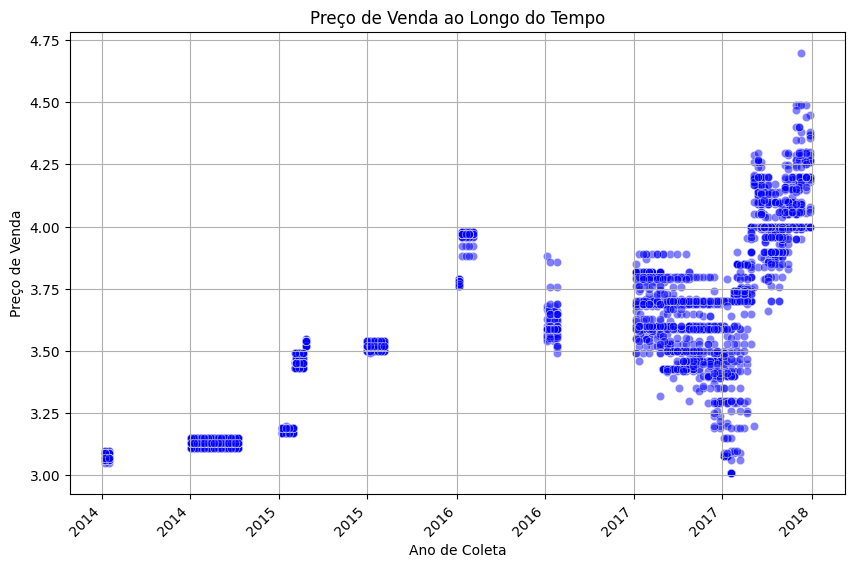

In [24]:
data_filtered = data_filtered[(data_filtered['data_coleta'].dt.year >= 2014) & (data_filtered['data_coleta'].dt.year <= 2017)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_filtered, x='data_coleta', y='preco_venda', color='blue', alpha=0.5)

# Ajustar os marcadores e os rótulos no eixo x
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos em 45 graus e alinha à direita
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))  # Formata os rótulos como anos
plt.title('Preço de Venda ao Longo do Tempo')
plt.xlabel('Ano de Coleta')
plt.ylabel('Preço de Venda')
plt.grid(True)
plt.show()

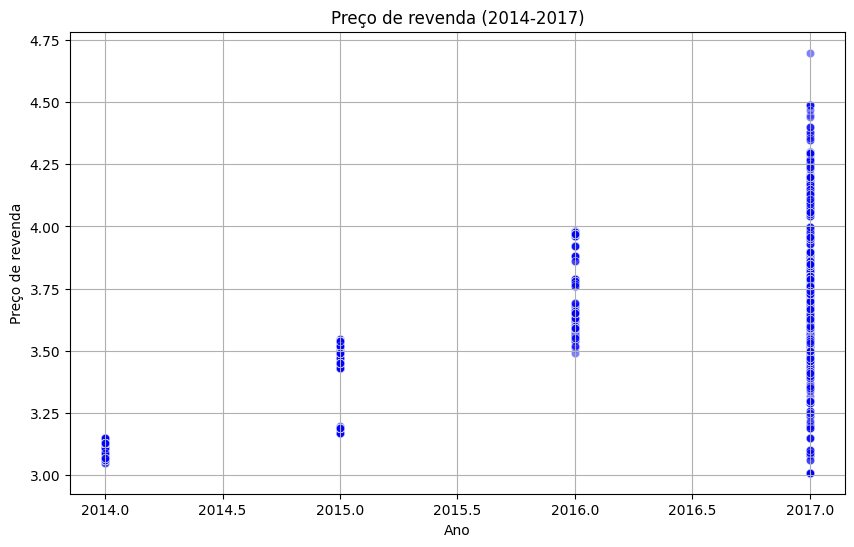

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_filtered, x='ano', y='preco_venda', color='blue', alpha=0.5)
plt.title('Preço de revenda (2014-2017)')
plt.xlabel('Ano')
plt.ylabel('Preço de revenda')
plt.grid(True)
plt.show()

In [ ]:
query = '''
SELECT ano, sigla_uf, id_municipio, bairro_revenda, cep_revenda, endereco_revenda, cnpj_revenda, nome_estabelecimento, bandeira_revenda, produto, unidade_medida, preco_compra, preco_venda FROM `basedosdados.br_anp_precos_combustiveis.microdados`
WHERE sigla_uf IN ('DF')
'''